# **Lab 4: First Draft of Final Project**
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

This lab is meant to be the first draft of motivation, methods, and one result for the final project of the class. In this lab, you will select a topic to investigate and perform an analysis to understand if this topic is of sufficient interest to use as a final project. You will be writing down many of these aspects in preparation for a final project presentation. 

For the final class project, you should investigate a topic from the course of your choosing. This topic can be related to anything we have discussed. For instance, you might choose to investigate a new implementation of Stable Diffusion training with an alternative latent space function (or new form of cross attention). Please do not let this example bias your choosing of a project--the topic you choose to investigate does not need to be a new algorithmic approach. It could be a new application of an algorithm we discussed. For instance, you might choose to use multi-task modeling for assessing robotic surgery. Or you might choose a new topic in ethical considerations of models. The only requirement is that the idea be something that creates new knowledge in the world and is somehow related to the vast number of topics we discussed in the class. 

Any topic can be chosen from ethical machine learning, convolutional visualization, data generation (with VAE's or GANs), multi-task or multi-modal architectures, stable diffusion, style transfer, or reinforcement learning. 

This lab will help you to ensure that the topic is appropriate for a final project in the course in terms of scope (not so easy that it might considered trivial, but not so hard that it might be considered a full blown dissertation). The right aim of scope should be such that you are investigating the initial analysis of a research topic--but there would still be much work to do for a full research publication. If you are unsure if your topic is appropriate, please contact the instructor for feedback.


# **Objective**
For our final project, we explore the application of **Reinforcement Learning** (RL) to the domain of **autonomous vehicles**, focusing on how RL can improve safety and decision-making processes in dynamic driving environments. Our analysis involves using a **simulated highway environment** (via highway-env) to train an RL agent to perform basic tasks like navigation, obstacle avoidance, and interaction with other vehicles. By implementing and testing different RL algorithms, we seek to understand their effectiveness in making real-time driving decisions and to analyze how these algorithms can be adapted for real-world applications.

Our **primary objective** is to determine how RL can be used to teach an autonomous vehicle to navigate safely and efficiently within a simulated environment, and to assess the performance of different algorithms in handling complex driving scenarios. Additionally, we will explore the broader implications of RL in autonomous driving, including safety, efficiency, and ethics, with the goal of providing insights into potential challenges when deploying RL-based systems in real-wrold autonomous vehicles. 

### **Terminology Used in This Project**
To ensure clarity and understanding in our analysis, we defined the following key terms use throughout our project:
- Reinforcement Learning (RL): A type of machine learning where an agent learns to make decisions by interacting with an environment, receiving rewards or penalties based on its actions (Medium)
- Agent: The autonomous vehicle in this scenario, which learns to navigate and make driving decisions based on the environment and rewards. (OpenAI Spinning Up)
- Environment: The simulated world in which the agent operates, which includes roads, traffic signs, other vehicles, pedestrians, and obstacles (OpenAI Spinning Up)
- State: A specific configuration of the environment, such as the position and speed of the vehicle, the distance to obstacles, or the presence of other cars. (OpenAI Spinning Up)
- Action: The decision made by the agent at a given state, such as steering left, speeding up, or braking. (OpenAI Spinning Up)
- Reward: A value assigned to the agent's actions, which helps it learn which behaviors are desirable (e.g., avoiding collisions or following traffic laws). (OpenAI Spinning Up)
- Q-Learning / Deep Q-Networks (DQN): RL algorithms used to estimate the expected future rewards for each action, helping the agent make optimal decisions in a given state. (HuggingFace)
- Proximal Policy Optimization (PPO): A state-of-the-art RL algorithm used for training in environments with large action spaces, such as controlling a vehicle's speed and direction. (HuggingFace)

Sources:
- Medium: https://medium.com/%40gurkanc/deep-reinforcement-learning-agents-algorithms-and-strategies-a-practical-game-scenario-a412428ae0e0
- OpenAI Spinning Up - Intro to RL: https://spinningup.openai.com/en/latest/spinningup/rl_intro.html
- HuggingFace: https://huggingface.co/learn/deep-rl-course/en/unit3/from-q-to-dqn
- HuggingFace: https://huggingface.co/blog/deep-rl-ppo

References:
- https://github.com/Farama-Foundation/HighwayEnv?tab=readme-ov-file
- https://github.com/TeyKra/Reinforcement-Learning-HighwayEnv/blob/main/Reinforcement%20Learning%20HighwayEnv.ipynb

# **1. Motivation**

[5 Points] 
- Motivate the need for the research project. 
- Why is this investigation important? 
- What related work are you building from? 
- What are the main research question(s)? 
- What is your hypothesis for what will happen? 
- This section should be something that can be converted into two or three slides for the final presentation. 
- You should write down the motivations and related work that will be presented to the instructor later on.  

## **1.1 Motivation for Our Research Project**

Autonomous vehicles (AVs) represent a transformative shift in the modern transportation industry, offering the promise of increased safety, accessibility, and efficiency. Despite substantial progress from industry leaders such as Waymo, the ability of AVs to consistently make safe, efficient, and ethically sound decisions in real time remains a critical challenge. These systems must operate in highly dynamic environments characterized by unpredictable traffic patterns, diverse road conditions, variable weather, and interactions with pedestrians and other vehicles.

Reinforcement learning (RL) presents a promising framework for optimizing the AV decision-making process through experience-based learning. Unlike rule-based or supervised approaches, RL agents learn through interaction with their environment, allowing for flexible and adaptive policy development in response to novel or uncertain situations.

The **motivation behind this project is to investigate how RL can improve AVs’ performance in terms of safety, efficiency, and adaptability**. By leveraging RL algorithms, we aim to enhance an autonomous vehicle’s ability to make intelligent decisions—such as when to accelerate, brake, or avoid obstacles—based on contextual information. These algorithms can generalize across varied driving scenarios, which may lead to more robust navigation strategies, reduced accident rates, and improved overall traffic efficiency.

The societal motivation for this research lies in the effort to reduce the staggering number of accidents caused by human error. AVs offer the potential to eliminate risks associated with distraction, fatigue, and impaired judgment. Beyond safety, they can expand mobility access to individuals unable to drive, optimize route planning and traffic flow, and reduce emissions through smoother, more deliberate driving patterns. As autonomous technologies progress toward real-world deployment, it is essential to ensure these systems can make real-time, intelligent decisions in complex, ever-changing environments. This project contributes to that goal by exploring reinforcement learning as a scalable and adaptable framework for intelligent autonomous driving.

## **1.2 Why is this investigation important?**
The importance of this research lies in addressing two of the most pressing challenges in the field of autonomous driving: safety and real-time decision-making in uncertain environments. While modern autonomous vehicle (AV) systems—such as Tesla’s Autopilot, Waymo’s Driver, and Cruise’s Origin platform—have demonstrated considerable progress, they remain limited in their ability to respond effectively to emergent, high-stakes scenarios. These include sudden pedestrian crossings, dynamic lane changes, traffic signal malfunctions, construction detours, and adverse weather conditions like heavy rain or fog. Several high-profile incidents underscore this limitation.

In 2023, Cruise paused all autonomous operations across the United States after an incident in San Francisco where one of its vehicles failed to yield appropriately and dragged a pedestrian following a collision caused by another car. Similarly, Tesla’s Autopilot and Full Self-Driving (FSD) systems have faced multiple investigations by the National Highway Traffic Safety Administration (NHTSA) due to collisions with stationary emergency vehicles and phantom braking events. Even Waymo, considered one of the most technically mature systems, has encountered issues with overly cautious behavior—such as freezing in intersections or failing to merge—causing confusion for human drivers and traffic flow disruptions.

These failures are rooted in the rigidity of current AV decision-making frameworks, which are largely deterministic or supervised-learning-based. Such systems rely on predefined rules or behavior learned from labeled datasets, limiting their ability to generalize to rare or novel situations. As a result, they are often brittle, overly conservative, or prone to misclassification under conditions that diverge from their training data.

Reinforcement learning (RL) offers a compelling alternative by enabling agents to learn optimal policies through interaction and feedback. Rather than relying solely on human-designed heuristics, RL-based systems iteratively refine their behavior by observing the long-term consequences of their actions. This allows the AV to learn nuanced driving behaviors—such as yielding to aggressive drivers, dynamically rerouting around construction, or adjusting speed in low-visibility weather—that would be difficult to hand-code or annotate in large-scale datasets.

The relevance of this investigation is further underscored by the increasing push for AV deployment on public roads, where safety is a primary concern. According to the National Highway Traffic Safety Administration (NHTSA), over 90% of vehicular accidents are attributable to human error. As AVs are introduced into mixed traffic ecosystems, their ability to make adaptive, ethical, and reliable decisions in real time becomes critical—not only for reducing accidents but also for gaining public trust and regulatory approval.

This research aligns with the broader shift in the AV industry from rigid, rule-driven systems to flexible, learning-based models capable of continuous improvement. By evaluating RL algorithms in realistic, high-fidelity driving scenarios, this project contributes to the development of autonomous systems that are not just operational, but robust, scalable, and safe for large-scale adoption.

**Refrences** 
* National Highway Traffic Safety Administration (NHTSA). (2015). Critical Reasons for Crashes Investigated in the National Motor Vehicle Crash Causation Survey.
* Tesla AI Team. (2021). Tesla Autonomy Day / AI Day. https://www.tesla.com/AI
* Waymo Safety Report. (2020). https://waymo.com/safety
* Aradi, S. (2020). Survey of deep reinforcement learning for motion planning of autonomous vehicles. IEEE Transactions on Intelligent Transportation Systems, 22(6), 3023-3035.

## **1.3 Related Work**

There has been substantial progress in applying reinforcement learning (RL) and related machine learning techniques to autonomous vehicle systems. Industry leaders such as Tesla and Waymo have pioneered real-time decision-making frameworks that leverage deep neural networks to control core driving functions. Tesla’s Autopilot system, for example, employs end-to-end deep learning models for lane detection, object classification, and lane-changing maneuvers (Tesla AI Team, 2021). Waymo, by contrast, utilizes a modular architecture that integrates deep learning and imitation learning, enabling its vehicles to navigate complex urban environments with a layered perception and decision pipeline (Waymo Team, 2020).

In academic research, simulation environments are widely used to train and evaluate RL agents due to safety constraints and the high cost of real-world experimentation. One notable example is **highway-env**, a lightweight, lane-based simulator tailored for high-level decision-making in multi-agent traffic scenarios. Unlike high-fidelity simulators such as CARLA (Dosovitskiy et al., 2017), which emphasize realism and detailed perception, highway-env enables rapid prototyping and benchmarking of RL algorithms. Algorithms like Deep Q-Networks (DQN) (Mnih et al., 2015) and Proximal Policy Optimization (PPO) (Schulman et al., 2017) have demonstrated success in tasks such as lane changing, collision avoidance, and maintaining safe following distances under dynamic traffic conditions.

Beyond autonomous driving specifically, foundational work from DeepMind has shaped the broader landscape of reinforcement learning in robotics and simulated environments. Their work on deep RL agents—particularly in domains such as game-playing and robotic control—highlights challenges in generalization, sample efficiency, and policy transfer (Silver et al., 2016). These insights are directly applicable to AVs, where agents must navigate highly variable and partially observable environments.

Our project builds on these efforts by evaluating the robustness and adaptability of RL algorithms in simulation-based driving scenarios that incorporate unpredictability—such as sudden pedestrian crossings, unexpected obstacles, or variable traffic flows. Unlike prior work that primarily focuses on achieving optimal performance in controlled settings, our focus is on understanding the **generalization limits** and **failure modes** of RL policies when exposed to out-of-distribution events. This perspective is essential for assessing the practical viability of RL-driven autonomy in safety-critical, real-world deployments.

**References**

- Dosovitskiy, A., Ros, G., Codevilla, F., Lopez, A., & Koltun, V. (2017). CARLA: An Open Urban Driving Simulator. *Conference on Robot Learning (CoRL)*.
- Mnih, V., Kavukcuoglu, K., Silver, D., et al. (2015). Human-level control through deep reinforcement learning. *Nature*.
- Schulman, J., Wolski, F., Dhariwal, P., Radford, A., & Klimov, O. (2017). Proximal Policy Optimization Algorithms. *arXiv preprint arXiv:1707.06347*.
- Silver, D., Huang, A., Maddison, C. J., et al. (2016). Mastering the game of Go with deep neural networks and tree search. *Nature*.
- Tesla AI Team. (2021). *Tesla AI Day 2021*. [https://www.tesla.com/AI](https://www.tesla.com/AI)
- Waymo Team. (2020). *On the Road to Fully Autonomous Driving*. [https://waymo.com/research](https://waymo.com/research)

## **1.4 Main Research Questions**
This research investigates how reinforcement learning (RL) can enhance autonomous vehicle (AV) decision-making in complex, real-world environments. The following questions guide our inquiry:

1. **How can reinforcement learning improve decision-making for autonomous vehicles in high-speed highway environments?**  
   In highway driving, autonomous vehicles must make rapid decisions while interacting with other moving vehicles—merging, overtaking, maintaining safe distances, and responding to variable traffic conditions. We aim to assess whether RL-based control systems can enable AVs to make safer, more efficient decisions compared to fixed-policy baselines in simulated highway scenarios using the highway-env environment.

2. **Which RL algorithms are most effective for training autonomous vehicles to navigate traffic, avoid collisions, and adapt to changing environments?**  
   To address this question, we will compare several widely studied RL algorithms—Q-Learning, Deep Q-Networks (DQN), and Proximal Policy Optimization (PPO)—in the highway-env. These algorithms differ in their learning dynamics, representational capacity, and suitability for discrete versus continuous action spaces. By evaluating their performance across various tasks (e.g., lane-following, obstacle avoidance, dynamic rerouting), we seek to identify which approach best balances learning efficiency, stability, and safety.

3. **How well do RL agents trained in one driving scenario generalize to new, unseen highway conditions?**  
   High performance in simulation does not guarantee successful deployment in the physical world. This question examines the “reality gap”: the extent to which learned policies generalize from synthetic to real-world domains. We will analyze agent behavior under unseen conditions (e.g., increased traffic density, occluded objects, new traffic rules, aggressive driver behavior) to evaluate generalization, robustness, and the potential need for domain adaptation techniques.

4. **What are the key limitations of using reinforcement learning in autonomous driving, and how can they be mitigated?**  
   Despite its potential, RL presents unique challenges in the context of AVs, including sample inefficiency, safety during exploration, reward design complexity, and ethical ambiguity in edge-case scenarios (e.g., unavoidable collisions). Our work aims to surface these limitations and propose possible strategies for addressing them, such as incorporating safety constraints, curriculum learning, or hybrid models that combine RL with rule-based oversight.

Together, these questions structure our investigation into how reinforcement learning can serve as a foundation for more intelligent, adaptable, and trustworthy autonomous driving systems.

## **1.5 Our Hypothesis**
We hypothesize that **reinforcement learning (RL) algorithms can significantly improve the real-time decision-making capabilities of autonomous vehicles by enabling agents to learn from environmental interactions and iteratively refine their behavior over time.** 

Specifically, we anticipate the following:

- **Deep Q-Networks (DQN)** will be effective for discrete, task-specific behaviors commonly seen in highway-env scenarios, such as lane keeping, overtaking, and collision avoidance. DQN’s ability to approximate Q-values in high-dimensional observation spaces allows it to optimize long-term safety and efficiency in structured, rule-based traffic environments.

- **Proximal Policy Optimization (PPO)** will demonstrate superior performance in more complex or adaptive driving tasks, particularly when extended to environments with continuous action components (e.g., speed modulation and strategic decision-making). PPO’s stability and robustness across policy updates make it well-suited for learning consistent, safe behavior under dynamic multi-agent conditions.

We expect that RL-trained agents will outperform traditional rule-based baselines on key performance metrics including collision rate, lane discipline, and travel time efficiency. Furthermore, we anticipate that these agents will demonstrate adaptive behavior under variations in traffic density, driver aggressiveness, and environmental layout.

However, we also recognize that RL models trained in simulation may struggle to generalize to real-world conditions. Simulation environments such as highway-env offer valuable platforms for controlled experimentation, but they lack the full sensory noise, complexity, and unpredictability of real-world driving. Bridging this “reality gap” will likely require additional mechanisms such as domain randomization, hybrid control schemes, or transfer learning techniques.

Overall, we hypothesize that reinforcement learning provides a promising framework for intelligent and adaptive autonomous driving. Still, its effective deployment will depend on addressing persistent challenges related to generalization, safety, and real-world robustness.

# **2. Methodology & Analysis**

[5 Points] 
- You have a great deal of free rein to decide what analyses you should use and therefore you will be graded on the appropriateness of the methods chosen. 
- Argue for a few analyses that can help to answer your research question(s). 
- You should argue for more than one kind of analysis to help answer your research questions. 
- Try to make this the first draft of your methodology. 
- This will eventually turn into 1-2 slides on methodology in your final presentation. 


## **2.1 Methodology & Analysis**
To investigate how reinforcement learning (RL) can enhance autonomous vehicle decision-making, we will conduct a series of experiments using highway-env, a lightweight, configurable simulation environment designed specifically for high-speed, multi-agent driving scenarios. This environment supports a wide range of traffic configurations, driver behaviors, and lane-based interactions, making it ideal for controlled yet realistic testing of RL agents. Rather than relying on high-fidelity graphics or physics, highway-env focuses on the dynamics of strategic decision-making—such as lane changes, overtaking, and safe distance maintenance—enabling rapid prototyping and iteration.

We will train agents using three reinforcement learning algorithms: Q-Learning, Deep Q-Networks (DQN), and Proximal Policy Optimization (PPO). Q-Learning serves as a classical baseline that provides insight into the performance of simpler tabular approaches in structured driving tasks. DQN offers a deep learning-based alternative that can handle high-dimensional observations and learn optimal policies for discrete action spaces. PPO, a more advanced on-policy algorithm, is known for its stability and sample efficiency and is particularly well-suited for dynamic, multi-agent environments where continuous decision-making and policy updates are required.

To answer our **first research question** -how reinforcement learning can improve decision-making in highway environments— we will simulate common driving challenges such as dense traffic, aggressive driver behaviors, lane merging, and dynamic speed changes. RL agents will be trained to maximize cumulative reward functions designed to reinforce safe, efficient, and rule-abiding behavior. These reward functions will include incentives for lane discipline, collision avoidance, maintaining appropriate speed, and reaching destinations quickly. The improvement in agent behavior over time will be analyzed through training curves, reduced collision rates, and increased travel efficiency, allowing us to quantify how decision-making evolves through learning.

To address the **second research question**, which concerns the effectiveness of different RL algorithms, we will compare Q-Learning, DQN, and PPO under identical training conditions. Each agent will be evaluated based on performance metrics including training stability, convergence speed, collision rate, and lane violation frequency. We will also evaluate how well each policy generalizes to test scenarios that were not seen during training. This comparative analysis will help determine which algorithm offers the best trade-off between learning efficiency, policy robustness, and real-time safety.

Our **third research question** investigates how well trained agents generalize to new and unseen highway conditions. For this, we will systematically modify environment variables such as traffic density, aggressiveness of surrounding vehicles, and initial spawn positions. Agents will be tested in these altered settings without further training to evaluate the robustness and flexibility of the learned policies. Performance will be assessed through changes in success rate, behavioral drift, and stability across variations. This generalization analysis will help reveal the strengths and limitations of each approach when faced with real-world unpredictability.

To explore the **fourth research question**, which concerns the challenges of using RL in autonomous driving, we will perform ablation studies and stress testing. These will involve intentionally introducing disruptions such as sudden lane blockages, incomplete sensory input, and irregular vehicle behaviors. We will examine how resilient each agent is to these edge cases and identify specific failure modes or limitations of the algorithms. In addition, we will analyze the impact of reward shaping on learned behavior, particularly how it influences ethical and safety-critical decisions. For instance, penalties for abrupt braking or red-light violations will be used to encourage alignment with real-world norms. If needed, we will also experiment with hybrid approaches that combine rule-based elements or safety layers into the RL framework to improve robustness.

Throughout the project, we will log and analyze a variety of data including learning curves, action distributions, trajectory visualizations, and video rollouts. This combination of algorithm benchmarking, generalization testing, and stress analysis will provide a comprehensive foundation for understanding the strengths, limitations, and practical potential of reinforcement learning for autonomous highway driving.

## **2.2 Environment Setup**
All experiments will be conducted using highway-env, a Python-based simulation environment designed for testing and training autonomous driving agents in highway scenarios. This environment provides a simplified yet effective abstraction of real-world driving, enabling the simulation of multi-lane roads, interacting vehicles, varying traffic densities, and driver behaviors. It supports different configurations such as lane numbers, vehicle acceleration dynamics, and traffic flow, allowing us to construct diverse training and testing conditions that reflect the complexities of high-speed highway driving.

By using highway-env, we are able to simulate both structured driving tasks, such as lane keeping and reaching a destination, and more dynamic challenges like overtaking slower vehicles, avoiding collisions, and responding to sudden changes in traffic behavior. The environment allows fine-grained control over simulation parameters and provides real-time visual feedback, making it well-suited for iterative reinforcement learning development. Additionally, its lightweight and efficient desgn allows agents to train over thousands of episodes without the computational burden of high-resolution graphics or physical modeling, thus supporting scalable experimentation in a safe, controlled, and repeatable setting.

## **2.3 Reinforcement Learning Algorithms**
We will implement the following RL algorithms for comparative analysis:

- **Deep Q-Networks (DQN)**: A reinforcement learning algorithm that leverages deep neural networks to approximate action-value functions in environments with high-dimensional state spaces. DQN uses experience replay and target networks to stabilize training, allowing it to effectively handle complex tasks that involve sequential decision-making and perception-based control.
  
- **Proximal Policy Optimization (PPO)**: A state-of-the-art policy gradient method known for its sample efficiency and training stability, particularly in continuous action environments such as vehicle control. PPO is expected to perform well in tasks requiring fine-grained control over steering, acceleration, and braking.

- **A2C (Advantage Actor-Critic)**: A policy gradient method that combines the benefits of both value-based and policy-based approaches. A2C uses two neural networks: an actor to select actions and a critic to evaluate them. This method is effective in continuous action spaces and has shown strong performance in environments requiring stable and efficient learning.

## **2.4 Experimental Tasks**
To assess the generalizability and robustness of each algorithm, agents will be evaluated on a progression of tasks:

1. **Basic Lane-Following**: Tests stability and path adherence under ideal conditions.
2. **Dynamic Vehicle Interaction**: Introduces multi-agent scenarios with varying vehicle speeds and densities, requiring safe merging, overtaking, and adaptive responses.
3. **Traffic Rule Compliance**: Evaluates adherence to basic driving norms such as lane discipline, safe following distances, and yielding behavior.
4. **Environmental Perturbation**: Evaluates policy robustness under reduced visibility, aggressive drivers, and modified road layouts.

Each agent will be trained on a subset of tasks and tested on both seen and unseen conditions to measure generalization.

## **2.5 Evaluation Metrics**
Our analysis will include both **quantitative** and **qualitative** metrics:

- **Safety**: Number of collisions, near-misses, or traffic violations per episode.
- **Efficiency**: Time-to-completion and distance traveled.
- **Reward Accumulation**: Cumulative reward across training and evaluation episodes.
- **Policy Robustness**: Drop in performance when transferred to new or perturbed environments.
- **Convergence Behavior**: Training stability and learning curves across episodes.

These metrics will allow us to compare not only raw performance but also the reliability and adaptability of each RL approach under varying conditions.

## **2.6 Analysis Strategy**
We will conduct both **intra-algorithm analysis** (comparing performance of each algorithm across tasks and conditions) and **inter-algorithm comparison** (benchmarking algorithms against one another). Additionally, visualizations such as reward curves, policy heatmaps, and behavioral traces will be used to illustrate differences in decision-making behavior.

Qualitative insights (e.g., agent hesitation at intersections or failure under occlusion) will also be recorded through visual inspection and frame-by-frame analysis of edge cases. This will help identify specific limitations in the learned policies and suggest directions for future improvement (e.g., curriculum learning, hybrid models, or safety constraints).

Together, these methods offer a comprehensive approach to evaluating the practical potential of reinforcement learning for autonomous vehicle decision-making in complex and variable environments.

# **3. Visualizations & Results**

[5 Points] 
- Perform one part of the analysis to help answer one (or more) research question(s). 
- Create visualizations that will help to provide evidence. 
- Discuss the results and how they provide evidence for answering the research questions. 
- Try to make this a first draft of one part of the results for the project.
- Try to have at least one visualization that you plan to use as a figure in the final presentation. 

## **3.1 Analysis of Our Research Question: How can reinforcement learning improve decision-making for autonomous vehicles in high-speed highway environments?**

In [1]:
# =============================================================================
# Modules & Libraries
# =============================================================================
import numpy as np
import os
import base64
import shutil
import gc
import torch
import highway_env 
import gymnasium as gym
import imageio
import matplotlib.pyplot as plt

from stable_baselines3 import PPO, DQN, A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold, BaseCallback
from moviepy import VideoFileClip, ColorClip, concatenate_videoclips
from IPython import display as ipythondisplay
from IPython.display import Image as IPImage
from pathlib import Path
from tqdm import tqdm
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
from tabulate import tabulate 
from IPython.display import Image

In [2]:
# =============================================================================
# Code Block for Deleting Existing Video Folder & Clearing Memory
# =============================================================================
video_dir = "../Rough Draft/videos"
if os.path.exists(video_dir):
    shutil.rmtree(video_dir)  
    os.makedirs(video_dir)  

# Clear memory
gc.collect()
torch.cuda.empty_cache() 

## Action space
The "highway-fast-v0" environment uses a discrete action space with 5 actions:

- 0: **LANE_LEFT**: Change lane to the left.
- 1: **IDLE**: Stay in the lane.
- 2: **LANE_RIGHT**: Change lane to the right.
- 3: **FASTER**: Speed up.
- 4: **SLOWER**: Slow down.

Source: https://highway-env.farama.org/actions/

In [3]:
# =============================================================================
# Action Space of the Environment
# =============================================================================
actions_mapping = {
    0: 'LANE_LEFT',
    1: 'IDLE',
    2: 'LANE_RIGHT',
    3: 'FASTER',
    4: 'SLOWER'
}

# Display all available actions
print("Available actions:", actions_mapping)

Available actions: {0: 'LANE_LEFT', 1: 'IDLE', 2: 'LANE_RIGHT', 3: 'FASTER', 4: 'SLOWER'}


### Video Recorder Setup

In [ ]:
# =============================================================================
# Fxns to Record & Display Videos (Modified to Collect Frames for GIF)
# =============================================================================
def record_videos_and_frames(env_hwy, model, video_length=200, prefix="", video_folder="videos/", fps=10, is_trained=True):
    eval_env = gym.make(env_hwy, render_mode="rgb_array", config=custom_config)
    frames = []
    obs, _ = eval_env.reset()
    
    print(f"\nRecording agent: {prefix}")
    print(f"{'Step':<5} | Action Taken")

    for step in range(video_length):
        if is_trained:
            action, _states = model.predict(obs, deterministic=True)
            action_scalar = int(action) 
        else:
            action_scalar = eval_env.action_space.sample()
            action = np.array([action_scalar])

        action_label = actions_mapping.get(action_scalar, "UNKNOWN")
        print(f"{step:<5} | {action_label}")

        obs, reward, done, truncated, info = eval_env.step(action)

        frame = eval_env.render()
        frames.append(frame)

        if done or truncated:
            break

    eval_env.close()

    # Add 3-second pause at the end (15 frames at 5 FPS)
    frames.extend([frames[-1]] * 15)

    gif_path = f"{video_folder}{prefix}_trajectory.gif"
    imageio.mimsave(gif_path, frames, fps=fps, loop=0)

    return gif_path

The `record_videos_and_frames` function captures the behavior of a reinforcement learning agent in a Gym environment and saves it as a `.gif` file. 

### Function Details:

- **Parameters**:
  - `env_hwy`: The name of the environment to evaluate.
  - `model`: The trained reinforcement learning model to be evaluated.
  - `video_length`: The number of steps to record.
  - `prefix`: A string to prefix the output filename.
  - `video_folder`: The folder where the `.gif` will be saved.
  - `fps`: The frame rate (frames per second) for playback speed.
  - `is_trained`: A flag indicating whether the model is trained or not. If not trained, random actions are taken.

- **Process**:
  1. The environment is initialized with the provided configuration.
  2. At each step, the agent either selects actions from the trained model (if `is_trained=True`) or takes random actions (if `is_trained=False`).
  3. After each action, a frame is captured and added to a list of frames.
  4. Once the maximum number of steps is reached or the episode ends, a short pause is added by repeating the last frame.
  5. The collected frames are saved as a `.gif` in the specified folder.

This function is useful for visually documenting how our agents performs in different environments, making it easier to review and share results.

Code Source: https://github.com/eleurent/highway-env

### Evaluation Function Setup

In [ ]:
# =============================================================================
# Fxn to Evaluate the RL Agents
# =============================================================================
def evaluate(model, num_episodes=30):
    env_hwy = "highway-fast-v0"
    env = make_vec_env(env_hwy)
    episode_rewards = []
    episode_times = []
    print(f"evaluating Model on {num_episodes} episodes ...")
    
    for _ in tqdm(range(num_episodes)):
        obs = env.reset()
        done = False
        total_reward = 0
        start_time = 0
        current_time = 0

        while not done:
          action, _states = model.predict(obs, deterministic=True)
          obs, reward, done, info = env.step(action)
          total_reward += reward
          current_time += 1

        episode_rewards.append(total_reward)
        episode_times.append(current_time - start_time)

    mean_reward = np.mean(episode_rewards)
    mean_time = np.mean(episode_times)
    std_reward = np.std(episode_rewards)
    std_time = np.std(episode_times)
    
    metrics = ["Mean Reward", "Mean Elapsed Time"]
    values = [mean_reward, mean_time]
    std_devs = [std_reward, std_time]
    
    table = list(zip(metrics, values, std_devs))
    
    print("\nResults:")
    print(tabulate(table, headers=["Metric", "Value", "Std Dev"], tablefmt="grid"))
    
    return mean_reward, mean_time

### Highway Environment Setup

In this project, `Gym` provides the main interface for creating and managing reinforcement learning environments, while `highway_env` registers the `highway-fast-v0` environment for simulating realistic highway driving scenarios. The `PPO`, `DQN`, and `A2C` algorithms from Stable Baselines3 are used to enable a comparative study of different reinforcement learning strategies. Additionally, `DummyVecEnv` is employed to wrap the environment, allowing for a single environment to be used in parallel with the training process. This setup helps speed up training by managing the environment more efficiently. The `evaluate_policy` function is used to assess the agent's performance, while the `EvalCallback` and `StopTrainingOnRewardThreshold` callbacks manage the training process by periodically evaluating the model and halting once a specific reward threshold is met, ensuring an efficient and effective training cycle.


#### Testing An Untrained DQN Model & Seeing How it Behaves 

In [ ]:
# =============================================================================
# Setting Up the Environment for Untrained Model
# =============================================================================
custom_config = {
    "lanes_count": 4, 
    "collision_reward": -5,  
    "high_speed_reward": 0.6,
    "right_lane_reward": 0.2,         
    "lane_change_reward": -0.05,          
    "reward_speed_range": [15, 30],       
    "vehicles_count": 40,                  
    "duration": 50,
    "collision_terminal": True,    
    "offroad_terminal": True,          
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle"

}

# Create the environment with custom config
env_hwy = "highway-fast-v0"
env = DummyVecEnv([lambda: gym.make(env_hwy, render_mode="rgb_array", config=custom_config)])

untrained_model = DQN("MlpPolicy", env, verbose=1)

Using cpu device



Recording agent: untrained-agent
Step  | Action Taken
0     | SLOWER
1     | SLOWER
2     | IDLE
3     | FASTER
4     | LANE_RIGHT
5     | FASTER
6     | FASTER
7     | IDLE
8     | FASTER
9     | SLOWER
10    | FASTER


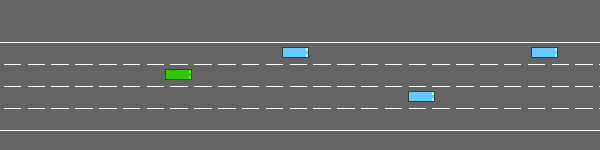

In [ ]:
# =============================================================================
# Displaying GIF of Untrained Model Behavior
# =============================================================================
untrained_gif = record_videos_and_frames(env_hwy, untrained_model, video_length=50, prefix="untrained-agent", fps=5, is_trained=False)

display(IPImage(untrained_gif))

### Analysis of Untrained Model
In the initial phase of evaluation, the untrained model displays erratic behavior due to its lack of learned policies. Without any prior training, the agent relies solely on random actions, leading to unpredictable movements. It exhibits erratic lane changes, unpredictable speed, and often swerves or collides with other vehicles. As a result, the model frequently crashes into other cars, demonstrating a complete lack of understanding of basic driving principles like lane-following and collision avoidance. The agent’s interactions with the environment are ineffective, as it does not learn to prioritize safe driving behaviors. This randomness in action, combined with the agent’s inability to recognize the importance of maintaining a safe distance from other vehicles, leads to accidents almost immediately. Although the agent might occasionally avoid crashes by chance, its lack of strategy or goal-oriented behavior results in overall poor performance. The untrained model serves as a baseline, highlighting the stark difference between random behavior and the optimized driving behavior that can be expected after the agent undergoes training through reinforcement learning algorithms such as DQN.

In [ ]:
# =============================================================================
# Evaluating the Untrained Model
# =============================================================================
untrained_reward, untrained_time = evaluate(untrained_model)

evaluating Model on 30 episodes ...


100%|██████████| 30/30 [00:10<00:00,  2.80it/s]


Results:
+-------------------+---------+-----------+
| Metric            |   Value |   Std Dev |
+===================+=========+===========+
| Mean Reward       | 7.21763 |   5.22113 |
+-------------------+---------+-----------+
| Mean Elapsed Time | 8.36667 |   5.21206 |
+-------------------+---------+-----------+


The evaluation of the untrained model reveals that, despite operating randomly, it does manage to accumulate some reward over 30 episodes. The mean reward is 7.22 with a standard deviation of 5.22, indicating that the agent occasionally performs actions that lead to positive outcomes, but these actions are largely unpredictable and not based on learned behavior. The standard deviation suggests significant variability in the model’s performance, which is expected for an untrained agent relying on random actions.

The mean elapsed time of 8.37 seconds per episode, with a standard deviation of 5.21, further supports the notion that the agent’s behavior is highly erratic. While the model takes an average of 8.37 seconds to complete each episode, there are episodes where it either completes tasks faster or slower, highlighting its inability to consistently follow the optimal driving route or avoid collisions. This variability is a clear reflection of the agent’s lack of strategic decision-making and adaptive behavior.

Overall, these results emphasize the significant gap between the untrained model’s random actions and the more structured, goal-oriented behavior expected from a trained reinforcement learning agent. The rewards and elapsed times are inconsistent, showing that while the model is capable of random actions, it has not yet learned to optimize its performance in the driving environment. We would need to compare these results to the performance of the trained DQN model below to assess improvements in both reward accumulation and decision-making efficiency.

## Observation Space

In the highway-env simulation, the observation space typically consists of information about the ego-vehicle and surrounding traffic, which can be represented in various forms, such as RGB images (pixel grids) or vectors of numerical values. These observations include the position, velocity, and type of both the ego-vehicle and other vehicles, along with road-related data like lane and traffic light states. The structure of the observation space can vary from simple discrete values (e.g., distance to the nearest vehicle) to continuous data (e.g., speed, acceleration, and steering angles), providing the agent with the necessary input to interact with the environment.

Source: https://highway-env.farama.org/observations/

In [9]:
# =============================================================================
# Observation Space of the Environment
# =============================================================================
# Display the observation space of the environment
print("Observation space:", env.observation_space)

# Reset the environment to obtain an initial observation
obs = env.reset()
print("Initial observation:\n", obs)

Observation space: Box(-inf, inf, (5, 5), float32)
Initial observation:
 [[[ 1.          0.67574555  0.5         0.3125      0.        ]
  [ 1.          0.11068894 -0.5        -0.0210634   0.        ]
  [ 1.          0.21982808  0.         -0.01384847  0.        ]
  [ 1.          0.31598365  0.         -0.03840012  0.        ]
  [ 1.          0.4275554  -0.25       -0.03724692  0.        ]]]


The observation space is defined as a **Box** with bounds (-inf, inf), indicating that the space can contain any real-valued input. It has a shape of (5, 5), meaning that each observation consists of a 5x5 matrix of continuous values. The data type of the elements is `float32`, which ensures that the values are stored in 32-bit floating-point format. Each row of the matrix represents an individual object or vehicle in the environment, while the columns correspond to specific features or properties of those objects. The first column contains a constant value, potentially representing the ego-vehicle or a flag. The second column includes normalized values ranging from 0 to 1, which may represent the vehicle's position or velocity. The third column contains values such as 0.6667 or 0, which could indicate discrete states such as lane positions or whether the vehicle is idle or moving. The fourth column shows negative values, possibly related to the vehicle’s velocity or acceleration, suggesting motion dynamics. The fifth column appears to be a placeholder, likely reserved for an additional feature or state that is not used in this specific observation. Overall, this observation provides a detailed snapshot of the environment’s state, including positional, velocity, and state information relevant for decision-making by the agent.


## Training DQN Agent on the Environment

In [ ]:
# =============================================================================
# Setting Up the Environment for DQN Model
# =============================================================================
dqn_config = {
    "lanes_count": 4, 
    "collision_reward": -5,  
    "high_speed_reward": 0.6,
    "right_lane_reward": 0.2,         
    "lane_change_reward": -0.05,          
    "reward_speed_range": [15, 30],       
    "vehicles_count": 40,                  
    "duration": 50,
    "collision_terminal": True,    
    "offroad_terminal": True,          
    "other_vehicles_type": "highway_env.vehicle.behavior.IDMVehicle"

}

env_hwy = "highway-fast-v0"
dqn_env = DummyVecEnv([lambda: Monitor(gym.make(env_hwy, render_mode="rgb_array", config=dqn_config))])

# Display the full configuration of the first environment instance
print("Full configuration:", dqn_env.envs[0].unwrapped.config)

Full configuration: {'observation': {'type': 'Kinematics'}, 'action': {'type': 'DiscreteMetaAction'}, 'simulation_frequency': 5, 'policy_frequency': 1, 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle', 'screen_width': 600, 'screen_height': 150, 'centering_position': [0.3, 0.5], 'scaling': 5.5, 'show_trajectories': False, 'render_agent': True, 'offscreen_rendering': False, 'manual_control': False, 'real_time_rendering': False, 'lanes_count': 4, 'vehicles_count': 40, 'controlled_vehicles': 1, 'initial_lane_id': None, 'duration': 50, 'ego_spacing': 1.5, 'vehicles_density': 1, 'collision_reward': -5, 'right_lane_reward': 0.2, 'high_speed_reward': 0.6, 'lane_change_reward': -0.05, 'reward_speed_range': [15, 30], 'normalize_reward': True, 'offroad_terminal': True, 'collision_terminal': True}


This configuration output describes the settings for the highway-fast-v0 environment, a simulation designed for highway driving. The observation type is set to 'Kinematics', meaning the agent's state is based on vehicle motion parameters. The action space is defined as 'DiscreteMetaAction', allowing for a set of discrete actions such as lane changes and speed adjustments. The simulation runs at a frequency of 5 Hz, while the policy frequency (how often the agent takes actions) is set to 1 Hz. Other vehicle types are modeled using IDMVehicle, a common traffic model. The screen dimensions are 600x150 pixels, and the environment is scaled at 5.5 times its original size. The simulation involves 3 lanes and 20 vehicles, with the agent controlling a single vehicle. Rewards are given based on factors like vehicle speed, lane position, and lane changes, with penalties for collisions. The environment includes a 30-second duration, with vehicles spaced 1.5 meters apart, and rewards are normalized within a speed range of 20 to 30 km/h. Off-road behavior is not considered a terminal state, and the simulation does not render the agent in real-time, though it can render the environment offscreen.

## Training the DQN Model

In [11]:
# =============================================================================
# Define Callback to Track Rewards
# =============================================================================
class RewardTrackerCallback(BaseCallback):
    def __init__(self):
        super().__init__()
        self.rewards = []

    def _on_step(self) -> bool:
        if "episode" in self.locals["infos"][0]:
            self.rewards.append(self.locals["infos"][0]["episode"]["r"])
        return True

In [ ]:
# =============================================================================
# DQN Training
# =============================================================================
reward_callback = RewardTrackerCallback()

dqn_model = DQN(
    'MlpPolicy', dqn_env,
    policy_kwargs=dict(net_arch=[256, 256]),  
    learning_rate=5e-4,                
    buffer_size=15000,                     
    learning_starts=200,         
    batch_size=32,                          
    gamma=0.8,                               
    train_freq=1,                           
    gradient_steps=1,                      
    target_update_interval=50,               
    exploration_fraction=0.7,        
    verbose=1,                                
    tensorboard_log='./highway/dqn/'       
)

dqn_model.learn(total_timesteps=30000, callback=reward_callback)

Using cpu device
Logging to ./highway/dqn/DQN_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18       |
|    ep_rew_mean      | 15.9     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 9        |
|    time_elapsed     | 7        |
|    total_timesteps  | 72       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 15       |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 9        |
|    time_elapsed     | 13       |
|    total_timesteps  | 136      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 12.7     |
|    exploration_rate | 0.992    |
| time/


Recording agent: trained-agent
Step  | Action Taken
0     | LANE_RIGHT
1     | LANE_RIGHT
2     | LANE_RIGHT
3     | LANE_RIGHT
4     | LANE_RIGHT
5     | SLOWER
6     | LANE_RIGHT
7     | LANE_RIGHT
8     | LANE_RIGHT
9     | LANE_RIGHT
10    | LANE_RIGHT
11    | LANE_RIGHT
12    | LANE_RIGHT
13    | LANE_RIGHT
14    | LANE_RIGHT
15    | LANE_RIGHT
16    | LANE_RIGHT
17    | LANE_RIGHT
18    | LANE_RIGHT
19    | LANE_RIGHT
20    | LANE_RIGHT
21    | LANE_RIGHT
22    | LANE_RIGHT
23    | LANE_RIGHT
24    | LANE_RIGHT
25    | LANE_RIGHT
26    | LANE_RIGHT
27    | FASTER
28    | LANE_RIGHT
29    | LANE_RIGHT
30    | LANE_RIGHT
31    | LANE_RIGHT
32    | LANE_RIGHT
33    | LANE_RIGHT
34    | LANE_RIGHT
35    | IDLE
36    | IDLE
37    | FASTER
38    | FASTER
39    | LANE_RIGHT
40    | LANE_LEFT
41    | IDLE
42    | IDLE
43    | LANE_RIGHT
44    | LANE_RIGHT
45    | LANE_RIGHT
46    | LANE_RIGHT
47    | LANE_RIGHT
48    | LANE_RIGHT
49    | FASTER


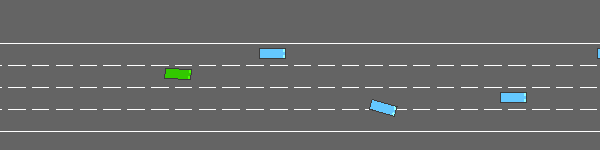

In [ ]:
# =============================================================================
# Record & Display Trained Agent 
# =============================================================================
trained_gif = record_videos_and_frames(env_hwy, dqn_model, video_length=50, prefix="trained-agent", fps=5, is_trained=True)
display(IPImage(trained_gif))

The DQN trained model exhibits more cautious and deliberate driving behavior compared to the untrained agent. It demonstrates an ability to slow down and maintain position in lanes with a lower risk of collision, suggesting that it has learned to make safer, more strategic decisions during driving. This is in stark contrast to the untrained agent, which often behaves erratically and crashes into other vehicles. The DQN agent improved its ability to navigate the environment with fewer collisions, indicating its successful adaptation to the task and its ability to optimize safety in a complex driving scenario.

In [14]:
# =============================================================================
# Evaluate Trained Agent
# =============================================================================
trained_reward, trained_time = evaluate(dqn_model)

evaluating Model on 30 episodes ...


100%|██████████| 30/30 [00:25<00:00,  1.18it/s]


Results:
+-------------------+---------+-----------+
| Metric            |   Value |   Std Dev |
+===================+=========+===========+
| Mean Reward       | 14.8158 |   7.78293 |
+-------------------+---------+-----------+
| Mean Elapsed Time | 17.6667 |   8.84056 |
+-------------------+---------+-----------+


### Analysis of Trained Model Evaluation Results
The evaluation of the trained model demonstrates a marked improvement compared to the untrained agent. The mean reward of 14.82, with a standard deviation of 7.78, indicates that the trained agent is consistently achieving higher rewards than the untrained one. This suggests that the model has successfully learned from its interactions in the environment and is now making more informed decisions that result in positive outcomes, though the variability in reward accumulation still indicates some degree of unpredictability in the agent's behavior.

The mean elapsed time of 17.67 seconds per episode, with a standard deviation of 8.84, shows that the trained model is taking slightly longer to complete episodes than the untrained one. While this might suggest more careful decision-making or attempts to avoid risky actions, the higher variability in time compared to the untrained agent indicates that the trained model’s actions are still not entirely consistent. This could be due to the complexity of the driving environment or the exploration-exploitation trade-off during training.

The improvement in mean reward suggests that the trained model is more successful in completing tasks and avoiding failures compared to its random counterpart. However, the higher variability in both reward and elapsed time points to the potential for further refinement, possibly through more training or adjustments to the model's hyperparameters. An in-depth analysis of the agent's decision-making process during training could reveal areas where the model can further optimize its performance, such as reducing the time taken per episode while maintaining high reward accumulation.

In comparison to the untrained model, the trained agent demonstrates substantial progress in both learning from its environment and improving its performance, though further fine-tuning could lead to more consistent and efficient behavior.

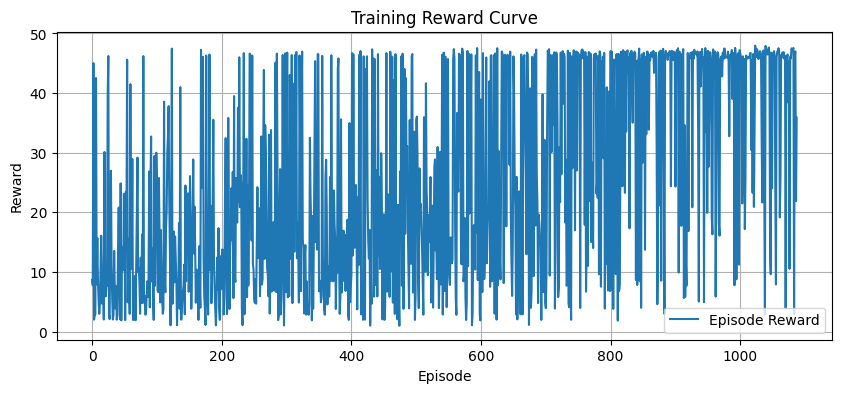

In [15]:
# =============================================================================
# Plot Reward Curve
# =============================================================================
plt.figure(figsize=(10, 4))
plt.plot(reward_callback.rewards, label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Reward Curve")
plt.grid(True)
plt.legend()
plt.show()


### NEED ANALYSIS

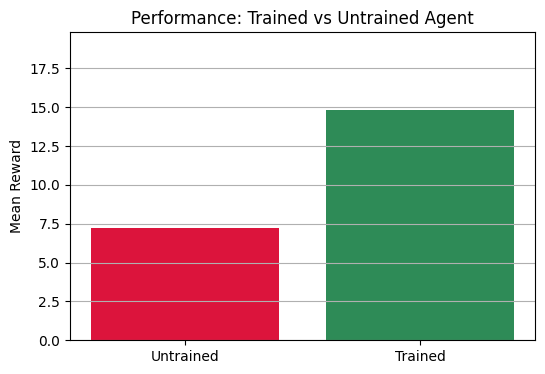

In [16]:
# =============================================================================
# Comparing Untrained vs. Trained Agent
# =============================================================================
labels = ['Untrained', 'Trained']
rewards = [untrained_reward, trained_reward]

plt.figure(figsize=(6, 4))
plt.bar(labels, rewards, color=['crimson', 'seagreen'])
plt.ylabel("Mean Reward")
plt.title("Performance: Trained vs Untrained Agent")
plt.ylim(0, max(rewards) + 5)
plt.grid(axis='y')
plt.show()


### NEED ANALYSIS

### **So how can reinforcement learning improve decision-making for autonomous vehicles in high-speed highway environments based on our findings?**
- Discuss the results and how they provide evidence for answering the research questions.

To answer how reinforcement learning (RL) can improve decision-making for autonomous vehicles  in high-speed highway environments, we focused on the improvements in behavior and performance that the trained agent demonstrates compared to an untrained agent. 

1. Behavior Improvement with RL (DQN):
The untrained model (which uses random actions) behaves erratically, often causing collisions or unsafe maneuvers. This random decision-making highlights the limitations of non-RL-based approaches, where agents rely on predefined rules or random behavior, often lacking adaptability to complex and dynamic environments like highways.

In contrast, the trained DQN model showcases more adaptive and intelligent decision-making. It learns to prioritize lane-keeping, avoid collisions, and optimize speed in response to the surrounding traffic conditions. By learning from the environment, the agent improves its safety and efficiency. For instance, it slows down when necessary to avoid collisions and stays in lanes with fewer vehicles, reducing the likelihood of accidents.

2. Quantitative Evidence from Reward Metrics:
From the evaluation results, the trained DQN agent has a higher mean reward (14.82) compared to the untrained agent (7.22). The reward function is designed to favor safe driving behaviors like maintaining a safe distance from other vehicles and avoiding collisions. The significant increase in reward for the trained model suggests that it is making better decisions in terms of safety and efficiency.

Additionally, the mean elapsed time for the trained agent (17.67) is higher than the untrained agent (8.37), which could indicate that the trained agent is taking a more cautious approach, carefully maneuvering to avoid collisions while prioritizing safety over speed.

3. Improvement in Long-Term Decision-Making:
In high-speed highway environments, long-term decision-making is crucial. RL algorithms like DQN learn sequential decision-making, enabling agents to plan actions based on the immediate and future consequences. This learning process allows the trained model to optimize driving strategies that might involve slower speeds or lane changes to avoid potential hazards, providing a safer driving experience.

The reward curve (episode reward over time) shows that the agent’s performance improves gradually as it is exposed to more training episodes. This learning process mimics how real-world AVs would adapt to complex road conditions by gaining experience and improving their decision-making strategies over time.

4. Visualization for Evidence:
The bar plot comparing the mean rewards for the untrained and trained agents visually supports the claim that RL improves performance. The trained agent consistently achieves higher rewards, indicating it is making better decisions in terms of safety, efficiency, and adaptability.

The training reward curve also illustrates the improvement in the agent’s decision-making process over time, highlighting how the agent learns to optimize its behavior in response to the environment.

In conclusion, reinforcement learning, through algorithms like DQN, allows autonomous vehicles to improve decision-making in high-speed highway environments by enabling the agent to learn from its interactions with the environment. The trained agent demonstrates superior decision-making by exhibiting safer, more efficient driving behavior compared to the untrained model, which operates on random actions. Through rewards for safe and efficient behaviors, the trained agent adapts its strategies, prioritizing safety and avoiding collisions, thus improving its overall performance. These improvements are evident both quantitatively (higher mean reward) and qualitatively (safer, more stable driving behavior), demonstrating that RL can significantly enhance the decision-making capabilities of autonomous vehicles in complex environments like highways.

****** THINGS NEED TO DO STILL ******
- CHANGE THE ENVIRONMENT PARAMETERS SUCH AS MORE LANES, MORE VEHICLES, ETC TO SHOW THAT DQN CONTINUES TO LEARN 